In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob

from scipy.stats import entropy as entropy_fcn

In [29]:
# data_dir = "../data/test_output/bs-5_wsib-5"
# data_dir = "../data/test_output/bs-15_wsib-5"
# data_dir = "../data/test_output/bs-30_wsib-5"
data_dir = "../data/test_output/bs-30_wsib-10"
# data_dir = "../data/test_output/bs-30_wsib-30"
# data_dir = "../data/test_output/benchmark"


# ds= [
#     ["t", 3500, 4500],
#  ["ds02", 12500, 15500],
#  ["ds02", 30000, 40000],
#  ["ds03", 23000, 33000],
#  ["ds04", 50000, 60000],
#  ["ds06", 10000, 20000], not use
#  ["ds07", 20000, 40000],
#  ["ds07", 30000, 35000]
# ]

ds= [
#     ["t", 3500, 4500],
#  ["ds02", 160000, 180000],
#  ["ds03", 20000, 50000],
#  ["ds04", 50000, 60000],
#  ["ds06", 10000, 20000], not use
 ["ds07", 20000, 40000],
#  ["ds07", 30000, 35000]
]

window_size = 30
for i, name in enumerate(ds):
    
    sim_string0 = '.*alg-0*.csv'
    sim_string2 = '.*alg-2*.csv'
    g0 = sorted(glob(f"{data_dir}/{name[0]}{sim_string0}"))
    g2 = sorted(glob(f"{data_dir}/{name[0]}{sim_string2}"))

    df0 = pd.DataFrame()
    df2 = pd.DataFrame()

    for f in g0:
        df0 = df0.append(pd.read_csv(f))
    for f in g2:
        df2 = df2.append(pd.read_csv(f))

    df0.set_index('x', inplace=True)     
    df2.set_index('x', inplace=True)
    df0.reset_index(inplace=True)
    df2.reset_index(inplace=True)
    df0.ffill(inplace=True)
    df2.ffill(inplace=True)
    df0.dropna(inplace=True)
    df2.dropna(inplace=True)
    
    calc0 = df0.dropna()
    calc2 = df2.dropna()

    df2 = calc2.e_a_ll.rolling(window=window_size).agg({"y_median": np.median})
    df2 = df2.fillna(method='bfill')

    df = pd.concat([calc2, df2], axis=1)
#     entropy_val = entropy_fcn(np.ones(5)/5.)
#     df0.fillna(entropy_val,inplace=True)
#     df2.fillna(entropy_val,inplace=True)

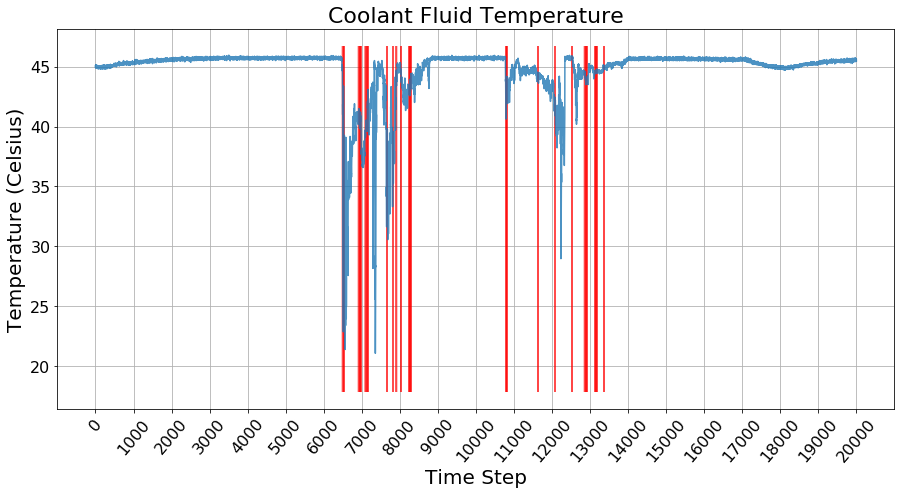

In [31]:
# loc_mask = (df["y_median"].values/df["e_a_ll"].values) > 1.01  # ds2
loc_mask = (df["y_median"].values/df["e_a_ll"].values) > 1.02
# simulation_data = df["y"].values
simulation_data = df["y"].values[ds[0][1]:ds[0][2]]
anon_locs = loc_mask[ds[0][1]:ds[0][2]]
x_tick_arr = np.arange(simulation_data.shape[0]+1,step=1000)
plt.figure(figsize=(15,7))
plt.plot(simulation_data, alpha=0.8)
plt.vlines(np.arange(simulation_data.shape[0])[anon_locs], ymax=df.y.max(), ymin=df.y.min()-0.1, color='r', alpha=0.1)
plt.ylabel("Temperature (Celsius)", fontsize=20)
# plt.ylabel("Flow (kg/s)", fontsize=20)
plt.xlabel("Time Step", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(x_tick_arr,fontsize=16, rotation=50)
plt.title("Coolant Fluid Temperature", fontsize=22)
# plt.title("Coolant Fluid Flow", fontsize=22)
# plt.title(f"Dataset-{ds[0][0]}-Temperature",fontsize=22)
plt.grid(True)
# plt.savefig(f"figs/{ds[0][0]}-2.png",bbox_inches='tight')
# plt.show()
# plt.savefig("figs/machine-example.png", bbox_inches='tight')
# plt.savefig("figs/ds4-2.png", bbox_inches='tight')
# plt.savefig("figs/anomaly_example.png", bbox_inches='tight')


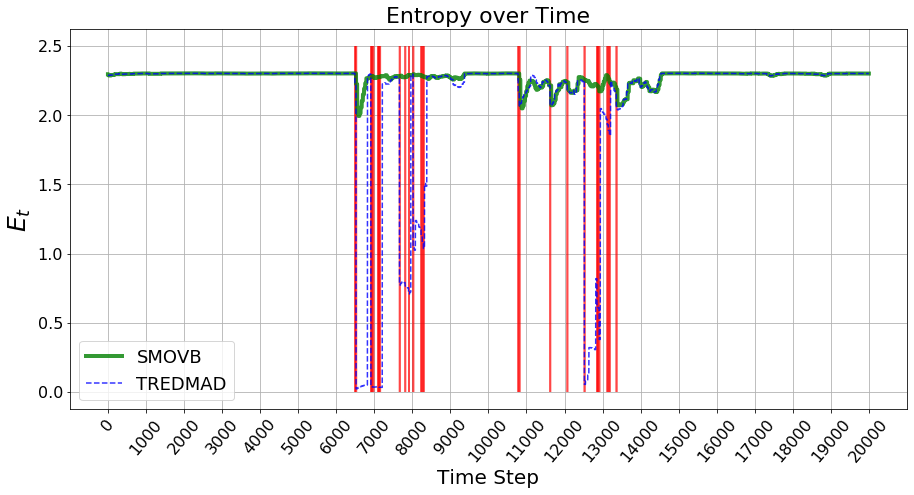

In [32]:
# entropy0 = df0["e_a_ll"].values
# entropy2 = df2["e_a_ll"].values
entropy0 = df0["e_a_ll"].values[ds[0][1]:ds[0][2]]
entropy2 = df["e_a_ll"].values[ds[0][1]:ds[0][2]]
entropy_tau = entropy_fcn(np.ones(10)/10.)*0.5
plt.figure(figsize=(15,7))
plt.plot(entropy0,"-g", alpha=0.8,linewidth=4, label="SMOVB")
plt.plot(entropy2,"--b", alpha=0.8, label="TREDMAD")
# plt.plot(np.arange(entropy0.shape[0]), np.ones(entropy0.shape[0])*entropy_tau, "r", label=r'$\tau=1.15$')
plt.vlines(np.arange(simulation_data.shape[0])[anon_locs], ymax=2.5, ymin=0, color='r', alpha=0.1)
# plt.plot(ss_lst,"-o")
plt.title("Entropy over Time", fontsize=22)
plt.ylabel(r"$E_t$", fontsize=25)
plt.yticks(fontsize=16)
plt.xlabel("Time Step", fontsize=20)
plt.xticks(x_tick_arr, fontsize=16, rotation=50)

plt.grid(True)
plt.legend(loc="lower left",fontsize=18)
# plt.savefig(f"figs/all-models-entropy-append-b30-w10-{ds[0][0]}.png",bbox_inches='tight')
# plt.savefig("figs/all-models-entropy-nab-b5-w5.png",bbox_inches='tight')
plt.savefig(f"figs/all-models-entropy-{ds[0][0]}-b30-w10.png",bbox_inches='tight')

In [27]:
entropy_tau

1.1512925464970227

In [17]:
entropy_lst = []
# dir_lst = ["../data/test_output/bs-5_wsib-5",
#            "../data/test_output/bs-15_wsib-5",
#            "../data/test_output/bs-30_wsib-5"]

dir_lst = ["../data/test_output/bs-30_wsib-5",
           "../data/test_output/bs-30_wsib-10",
           "../data/test_output/bs-30_wsib-30"]


# For varying batch size
# ds= ["ds04", 22000, 26000]
# ds = ["ds07", 30000, 35000]

# For varying window
ds = ["ds07", 33000, 35000]
# ds = ["ds04", 24000, 26000]

for data_dir in dir_lst:
    sim_string2 = '.*alg-2*.csv'
    g2 = sorted(glob(f"{data_dir}/{ds[0]}{sim_string2}"))

    df2 = pd.DataFrame()

    for f in g2:
        df2 = df2.append(pd.read_csv(f))

    df2.set_index('x', inplace=True)
    df2.reset_index(inplace=True)
    df2.ffill(inplace=True)
    df2.dropna(inplace=True)
    entropy_lst.append(df2["a_ll"].values[ds[1]:ds[2]])

In [134]:
len(entropy_lst)

3

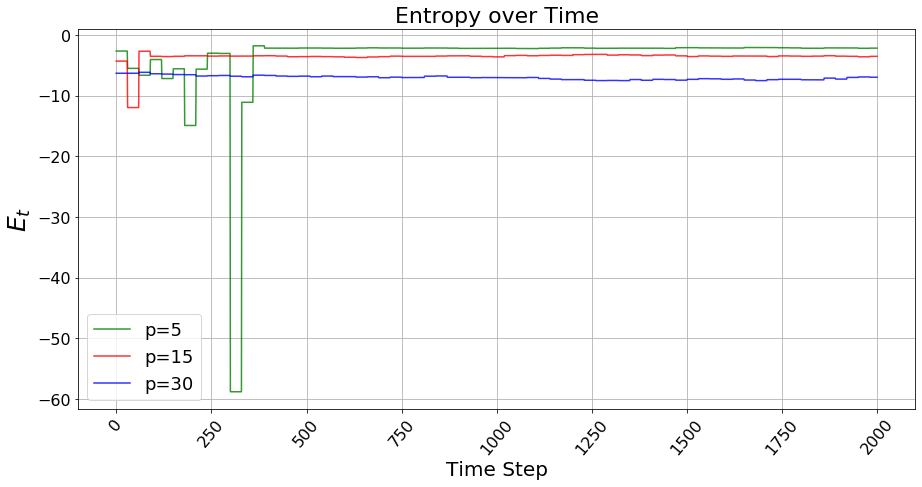

In [15]:
plt.figure(figsize=(15,7))
plt.plot(entropy_lst[0],"-g", alpha=0.8, label="p=5")
plt.plot(entropy_lst[1],"-r", alpha=0.8, label="p=15")
plt.plot(entropy_lst[2],"-b", alpha=0.8, label="p=30")
# plt.plot(np.arange(entropy0.shape[0]+50), np.ones(entropy0.shape[0]+50)*2., "r", label=r'$\tau=2$')
# plt.plot(ss_lst,"-o")
plt.title("Entropy over Time", fontsize=22)
plt.ylabel(r"$E_t$", fontsize=25)
plt.yticks(fontsize=16)
plt.xlabel("Time Step", fontsize=20)
plt.xticks(fontsize=16, rotation=50)

plt.grid(True)
plt.legend(fontsize=18)
# plt.savefig("figs/batch-entropy-vary-ds7.png",bbox_inches='tight')

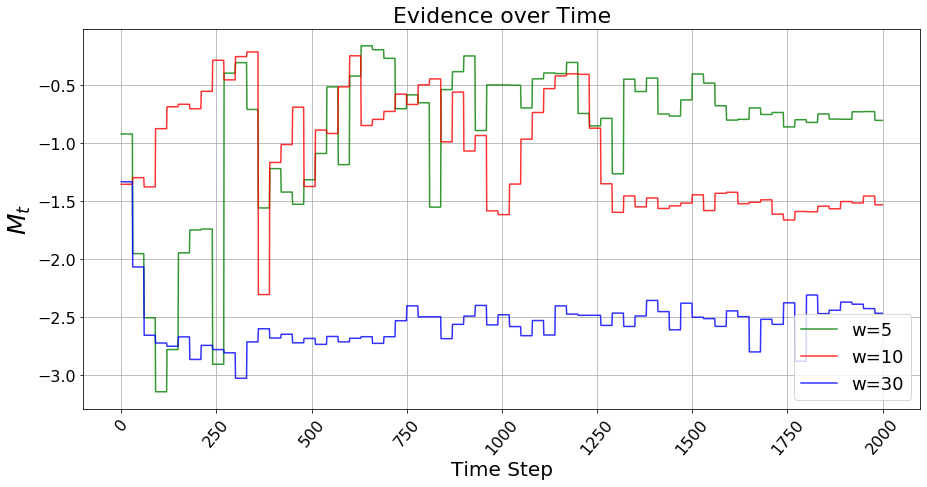

In [20]:
plt.figure(figsize=(15,7))
plt.plot(entropy_lst[0],"-g", alpha=0.8, label="w=5")
plt.plot(entropy_lst[1],"-r", alpha=0.8, label="w=10")
plt.plot(entropy_lst[2],"-b", alpha=0.8, label="w=30")
# plt.plot(np.arange(entropy0.shape[0]+50), np.ones(entropy0.shape[0]+50)*2., "r", label=r'$\tau=2$')
# plt.plot(ss_lst,"-o")
plt.title("Evidence over Time", fontsize=22)
plt.ylabel(r"$M_t$", fontsize=25)
plt.yticks(fontsize=16)
plt.xlabel("Time Step", fontsize=20)
plt.xticks(fontsize=16, rotation=50)

plt.grid(True)
plt.legend(fontsize=18)
plt.savefig("figs/win-entropy-vary-ds7.png",bbox_inches='tight')